In [4]:
from itertools import product

import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow.contrib.learn as learn
import tensorflow as tf
from plotly import offline as py, graph_objs as go

py.init_notebook_mode()

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:318: SNIMissingWarning: An HTTPS request has been made, but the SNI (Subject Name Indication) extension to TLS is not available on this platform. This may cause the server to present an incorrect TLS certificate, which can cause validation failures. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#snimissingwarning.
  SNIMissingWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.io/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


In [5]:
# Loading some example data
data = genfromtxt('ex2data1.txt', delimiter=',')
X = data[:,:-1]
y = data [:, 2].astype(np.int32)


scatter0 = go.Scatter(
    x=X[y==0][:, 0],
    y=X[y==0][:, 1],
    mode = 'markers',
    name="Failed",
    marker=dict(color="red")
)
scatter1 = go.Scatter(
    x=X[y==1][:, 0],
    y=X[y==1][:, 1],
    mode = 'markers',
    name="Passed",
    marker=dict(color="blue")
)

py.iplot([scatter0, scatter1])

Explicitly set `enable_centered_bias` to 'True' if you want to keep existing behaviour.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


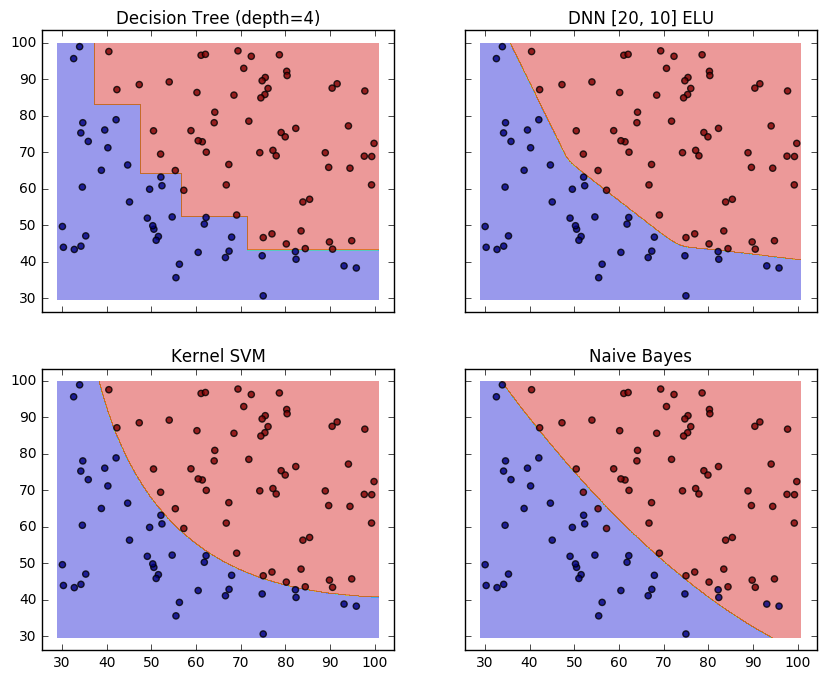

In [6]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = learn.DNNClassifier( 
    activation_fn=tf.nn.elu,
    hidden_units=[20, 10],
    n_classes=3,
    feature_columns=learn.infer_real_valued_columns_from_input(X),
    optimizer=tf.train.AdamOptimizer(
      learning_rate=0.01
    )
)
clf3 = SVC(kernel='poly', probability=True)
eclf = GaussianNB()


clf1.fit(X, y)
clf2.fit(X, y, steps=8000)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'DNN [20, 10] ELU',
                         'Kernel SVM', 'Naive Bayes']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [7]:
# Loading some example data
data = genfromtxt('ex2data2.txt', delimiter=',')
X = data[:,:-1] * 10.0
y = data [:, 2].astype(np.int32)


scatter0 = go.Scatter(
    x=X[y==0][:, 0],
    y=X[y==0][:, 1],
    mode = 'markers',
    name="Passed",
    marker=dict(color="blue")
)
scatter1 = go.Scatter(
    x=X[y==1][:, 0],
    y=X[y==1][:, 1],
    mode = 'markers',
    name="Failed",
    marker=dict(color="red")
)

py.iplot([scatter0, scatter1])

Explicitly set `enable_centered_bias` to 'True' if you want to keep existing behaviour.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.


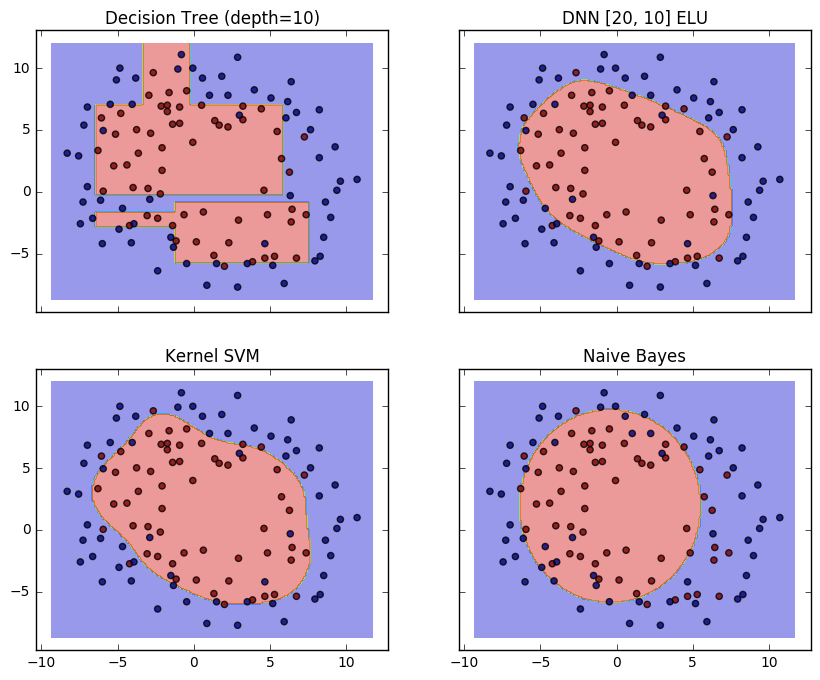

In [8]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=10, min_samples_split=8)
clf2 = learn.DNNClassifier( 
    activation_fn=tf.nn.elu,
    hidden_units=[20, 10],
    n_classes=3,
    feature_columns=learn.infer_real_valued_columns_from_input(X),
    optimizer=tf.train.FtrlOptimizer(
    learning_rate=0.01,
    l1_regularization_strength=1.0,
    l2_regularization_strength=1.0)
)
clf3 = SVC(kernel='rbf', probability=True, gamma=0.1)
eclf = GaussianNB()


clf1.fit(X, y)
clf2.fit(X, y, steps=8000)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=10)', 'DNN [20, 10] ELU',
                         'Kernel SVM', 'Naive Bayes']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [2]:
SVC?